In [1]:
import scipy as sc
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [2]:
dimDF = pd.read_csv("data/DimensionAnalysis.csv")

In [3]:
prunedDimDF = dimDF[["AnalysisType", "NumDimensions", "TimeMicroSeconds"]];
# display(prunedDimDF)

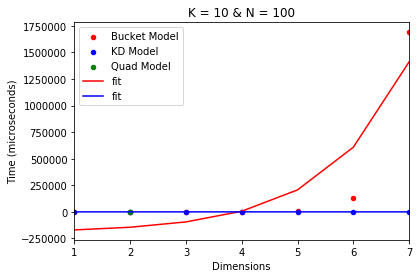

In [4]:
dimBuckets = prunedDimDF[(prunedDimDF.AnalysisType == "Bucket")]
dimKDs = prunedDimDF[(prunedDimDF.AnalysisType == "KD")]
dimQuads = prunedDimDF[(prunedDimDF.AnalysisType == "Quad")]

dimBucketOLS = sm.ols(formula="TimeMicroSeconds ~ I(2.0 ** NumDimensions)", data=dimBuckets).fit()
dimKDOLS = sm.ols(formula="TimeMicroSeconds ~ NumDimensions", data=dimKDs).fit()

fig, ax = plt.subplots()
ax1 = dimBuckets.plot.scatter('NumDimensions', 'TimeMicroSeconds', ax=ax, c='red', label="Bucket Model")
ax2 = dimKDs.plot.scatter('NumDimensions', 'TimeMicroSeconds', ax=ax, c='blue', label="KD Model")
ax3 = dimQuads.plot.scatter('NumDimensions', 'TimeMicroSeconds', ax=ax, c='green', label="Quad Model")

dimBuckets.assign(fit=dimBucketOLS.fittedvalues).plot('NumDimensions', 'fit', ax=ax, c='red')
dimKDs.assign(fit=dimKDOLS.fittedvalues).plot('NumDimensions', 'fit', ax=ax, c='blue')

ax.set_xlabel('Dimensions');
ax.set_ylabel('Time (microseconds)');
ax.set_title('K = 10 & N = 100');

**It's difficult to find a graph that captures both the time explosion that the KD tree displays and the modest increases of the KD tree.  As expected, the KD model has something close to a O(N) time profile, where the Bucket Model looks more like O(Buckets^N).  The OLS for the Bucket Model does an excellent job of describing the relationship, whereas the one for KD does reasonably well.  It's possible that the relationship looks more like O(Nlog(N))**

In [5]:
print("R-Squared: ", dimBucketOLS.rsquared.round(4))
print("NumDimensions coefficient: ", dimBucketOLS.params.round(4))
print("NumDimensions p-value: ", dimBucketOLS.pvalues.round(4))

R-Squared:  0.8294
NumDimensions coefficient:  Intercept                 -194950.3745
I(2.0 ** NumDimensions)     12552.1495
dtype: float64
NumDimensions p-value:  Intercept                  0.2288
I(2.0 ** NumDimensions)    0.0044
dtype: float64


In [6]:
print("R-Squared: ", dimKDOLS.rsquared.round(4))
print("NumDimensions coefficient: ", dimKDOLS.params.NumDimensions.round(4))
print("NumNeighbors p-value: ", dimKDOLS.pvalues.NumDimensions.round(4))

R-Squared:  0.6497
NumDimensions coefficient:  1.7438
NumNeighbors p-value:  0.0286


**From here on out all analysis will be in two dimensions to allow for good comparison with the QuadTree**

In [7]:
kAndDDF = pd.read_csv("data/k&n.csv")
# display(kAndDDF)

In [8]:
neighborsDF = kAndDDF[["AnalysisType", "NumPoints", "NumNeighbors", "TimeMicroSeconds"]][(kAndDDF.NumPoints == 5000)];
pointsDF = kAndDDF[["AnalysisType", "NumPoints", "NumNeighbors", "TimeMicroSeconds"]][(kAndDDF.NumNeighbors == 50)];
# display(neighborsDF)
# display(pointsDF)

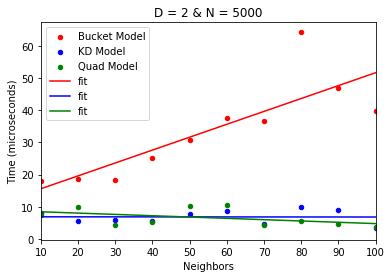

In [9]:
neiBuckets = neighborsDF[(neighborsDF.AnalysisType == "Bucket")]
neiKDs = neighborsDF[(neighborsDF.AnalysisType == "KD")]
neiQuads = neighborsDF[(neighborsDF.AnalysisType == "Quad")]

neiBucketOLS = sm.ols(formula="TimeMicroSeconds ~ NumNeighbors", data=neiBuckets).fit()
neiKDOLS = sm.ols(formula="TimeMicroSeconds ~ NumNeighbors", data=neiKDs).fit()
neiQuadOLS = sm.ols(formula="TimeMicroSeconds ~ NumNeighbors", data=neiQuads).fit()

fig, ax = plt.subplots()
ax1 = neiBuckets.plot.scatter('NumNeighbors', 'TimeMicroSeconds', ax=ax, c='red', label="Bucket Model")
ax2 = neiKDs.plot.scatter('NumNeighbors', 'TimeMicroSeconds', ax=ax, c='blue', label="KD Model")
ax3 = neiQuads.plot.scatter('NumNeighbors', 'TimeMicroSeconds', ax=ax, c='green', label="Quad Model")

neiBuckets.assign(fit=neiBucketOLS.fittedvalues).plot('NumNeighbors', 'fit', ax=ax, c='red')
neiKDs.assign(fit=neiKDOLS.fittedvalues).plot('NumNeighbors', 'fit', ax=ax, c='blue')
neiQuads.assign(fit=neiQuadOLS.fittedvalues).plot('NumNeighbors', 'fit', ax=ax, c='green')

ax.set_xlabel('Neighbors');
ax.set_ylabel('Time (microseconds)');
ax.set_title('D = 2 & N = 5000');

In [10]:
print("R-Squared: ", neiBucketOLS.rsquared.round(4))
print("NumNeighbors coefficient: ", neiBucketOLS.params.NumNeighbors.round(4))
print("NumNeighbors p-value: ", neiBucketOLS.pvalues.NumNeighbors.round(4))

R-Squared:  0.6803
NumNeighbors coefficient:  0.4004
NumNeighbors p-value:  0.0033


In [11]:
print("R-Squared: ", neiKDOLS.rsquared.round(4))
print("NumNeighbors coefficient: ", neiKDOLS.params.NumNeighbors.round(4))
print("NumNeighbors p-value: ", neiKDOLS.pvalues.NumNeighbors.round(4))

R-Squared:  0.0001
NumNeighbors coefficient:  -0.0007
NumNeighbors p-value:  0.9783


In [12]:
print("R-Squared: ", neiQuadOLS.rsquared.round(4))
print("NumNeighbors coefficient: ", neiQuadOLS.params.NumNeighbors.round(4))
print("NumNeighbors p-value: ", neiQuadOLS.pvalues.NumNeighbors.round(4))

R-Squared:  0.2058
NumNeighbors coefficient:  -0.0408
NumNeighbors p-value:  0.1879


**Interestingly, the number of points has no bearing on the cost required for KD KNN queries, and I expect the same should be the case for the QuadTree KNN query given that the coefficient is negative and the p-value is high (though not as high as as it is for KD), I think the the slight connection in the data is probably just the result of noise in the data.  There is a reasonably strong positive relationship with the bucketting KD and KNN though, as would be expected.**

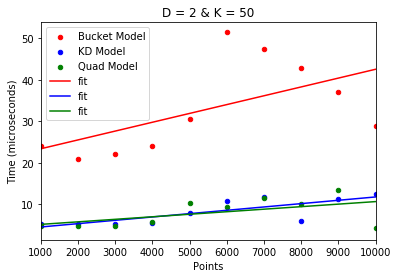

In [13]:
poiBuckets = pointsDF[(pointsDF.AnalysisType == "Bucket")]
poiKDs = pointsDF[(pointsDF.AnalysisType == "KD")]
poiQuads = pointsDF[(pointsDF.AnalysisType == "Quad")]

poiBucketOLS = sm.ols(formula="TimeMicroSeconds ~ NumPoints", data=poiBuckets).fit()
poiKDOLS = sm.ols(formula="TimeMicroSeconds ~ NumPoints", data=poiKDs).fit()
poiQuadOLS = sm.ols(formula="TimeMicroSeconds ~ NumPoints", data=poiQuads).fit()

fig, ax = plt.subplots()
ax1 = poiBuckets.plot.scatter('NumPoints', 'TimeMicroSeconds', ax=ax, c='red', label="Bucket Model")
ax2 = poiKDs.plot.scatter('NumPoints', 'TimeMicroSeconds', ax=ax, c='blue', label="KD Model")
ax3 = poiQuads.plot.scatter('NumPoints', 'TimeMicroSeconds', ax=ax, c='green', label="Quad Model")

poiBuckets.assign(fit=poiBucketOLS.fittedvalues).plot('NumPoints', 'fit', ax=ax, c='red')
poiKDs.assign(fit=poiKDOLS.fittedvalues).plot('NumPoints', 'fit', ax=ax, c='blue')
poiQuads.assign(fit=poiQuadOLS.fittedvalues).plot('NumPoints', 'fit', ax=ax, c='green')

ax.set_xlabel('Points');
ax.set_ylabel('Time (microseconds)');
ax.set_title('D = 2 & K = 50');

In [14]:
print("R-Squared: ", poiBucketOLS.rsquared.round(4))
print("NumPoints coefficient: ", poiBucketOLS.params.NumPoints.round(4))
print("NumPoints p-value: ", poiBucketOLS.pvalues.NumPoints.round(4))

R-Squared:  0.338
NumPoints coefficient:  0.0021
NumPoints p-value:  0.0779


In [15]:
print("R-Squared: ", poiKDOLS.rsquared.round(4))
print("NumPoints coefficient: ", poiKDOLS.params.NumPoints.round(4))
print("NumPoints p-value: ", poiKDOLS.pvalues.NumPoints.round(4))

R-Squared:  0.6129
NumPoints coefficient:  0.0008
NumPoints p-value:  0.0074


In [16]:
print("R-Squared: ", poiQuadOLS.rsquared.round(4))
print("NumPoints coefficient: ", poiQuadOLS.params.NumPoints.round(4))
print("NumPoints p-value: ", poiQuadOLS.pvalues.NumPoints.round(4))

R-Squared:  0.296
NumPoints coefficient:  0.0006
NumPoints p-value:  0.104


**This is the first time that we see a really interesting deviation from what I would have initially guessed.  As the number of points increase the time taken to run a KNN query for the buckets model initially increases but then drops because I imagine fewer and fewer buckets have to be checked to find the required number of neighbors.  I imagine once a bucket gets saturated enough the time cost will begin to increase again, eventually.  Both the KD and Quadtree implementation become modesly more expensive as more points are added**